In [197]:
import pandas as pd 
import numpy as np 
import scipy.stats as ss 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [198]:
data = pd.read_csv('titanic_train.csv')

In [199]:
data_test = pd.read_csv('titanic_test.csv')

In [200]:
data.shape

(891, 12)

In [201]:
data_test.shape

(418, 11)

In [202]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [203]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [204]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [205]:
data.shape

(891, 12)

In [206]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
data['Cabin'].loc[data['Age'].isna()].isna().sum()

158

Out of the total 177 null values of Age we have 158 null values in cabin

In [209]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [210]:
data['Cabin'].loc[data['Pclass']==2].isna().value_counts()

True     168
False     16
Name: Cabin, dtype: int64

### Cabin Missing Values 

1) There seems to be no relation with ticket 

In [211]:
data[['Cabin', 'Pclass', 'Fare']]

,Cabin,Pclass,Fare
0,NaN,3,7.2500
1,C85,1,71.2833
2,NaN,3,7.9250
3,C123,1,53.1000
4,NaN,3,8.0500
...,...,...,...
886,NaN,2,13.0000
887,B42,1,30.0000
888,NaN,3,23.4500
889,C148,1,30.0000


In [212]:
data[['Pclass', 'Fare']].loc[data['Cabin'].isna()]

,Pclass,Fare
0,3,7.2500
2,3,7.9250
4,3,8.0500
5,3,8.4583
7,3,21.0750
...,...,...
884,3,7.0500
885,3,29.1250
886,2,13.0000
888,3,23.4500


In [213]:
#data['Cabin'].loc[data[]]

In [214]:
data['Ticket'].value_counts().head(15)

CA. 2343        7
347082          7
1601            7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
2666            4
LINE            4
W./C. 6608      4
349909          4
19950           4
113781          4
17421           4
Name: Ticket, dtype: int64

In [215]:
data['Cabin'].loc[data['Ticket'] == '4133'].unique()

array([nan], dtype=object)

In [216]:
data['Cabin'].loc[data['Pclass'] == 3].value_counts()

G6       4
F G73    2
E121     2
F38      1
F E69    1
F G63    1
E10      1
Name: Cabin, dtype: int64

### Plcass 3 - has decks E,F and G 

In [217]:
data['Cabin'].loc[data['Pclass'] == 2].value_counts()

E101    3
F2      3
F33     3
D       3
F4      2
D56     1
E77     1
Name: Cabin, dtype: int64

### Plcass 2 has decks D,E and F 

In [218]:
data['Cabin'].loc[data['Pclass'] == 1].value_counts()

B96 B98        4
C23 C25 C27    4
C22 C26        3
C83            2
C2             2
              ..
E34            1
D15            1
C85            1
D47            1
E63            1
Name: Cabin, Length: 133, dtype: int64

### Pclass1 has decks A to E 

#### Split the Cabin to only A, B, C, D, E, F and NAN to U on both train and test sets

In [219]:
data.Cabin.fillna('U', inplace=True)

In [220]:
data_test.Cabin.fillna('U', inplace=True)

In [221]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])

In [222]:
data_test['Cabin'] = data_test['Cabin'].apply(lambda x: x[0])

In [223]:
data['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [224]:
data_test['Cabin'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [225]:
data['Cabin'].loc[data['Pclass'] == 1].value_counts()

C    59
B    47
U    40
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [226]:
data['Cabin'].loc[data['Pclass'] == 2].value_counts()

U    168
F      8
E      4
D      4
Name: Cabin, dtype: int64

In [227]:
data['Cabin'].loc[data['Pclass'] == 3].value_counts()

U    479
F      5
G      4
E      3
Name: Cabin, dtype: int64

[(0, 300)]

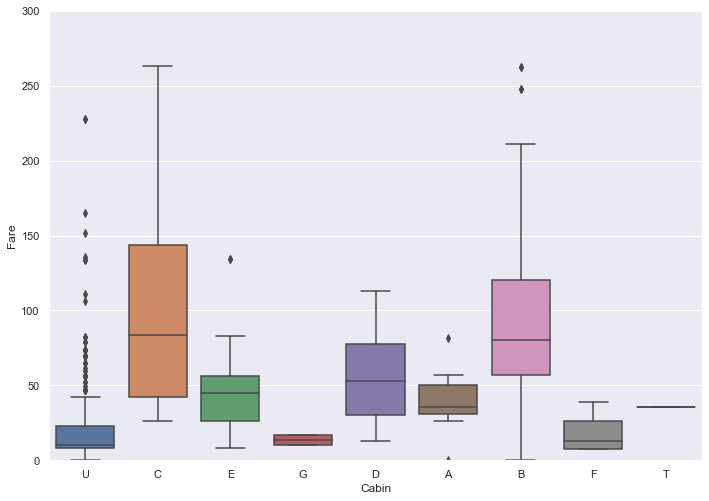

In [228]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.boxplot(x = 'Cabin', y ='Fare', data =data)
ax.set(ylim=(0, 300))

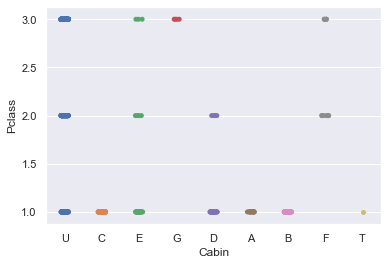

In [229]:
sns.stripplot(x = 'Cabin', y ='Pclass', data =data)

[(0, 300)]

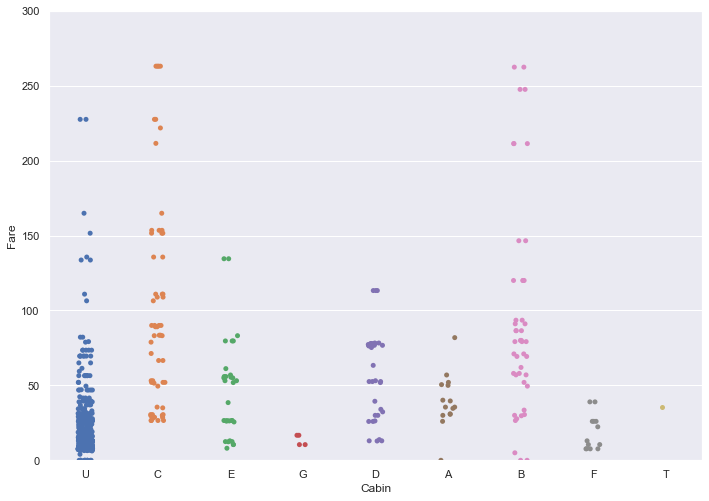

In [230]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Cabin', y ='Fare', data =data)
ax.set(ylim=(0, 300))

In [231]:
data[['Fare', 'Cabin']].loc[data['Embarked'] == 'Q']

,Fare,Cabin
5,8.4583,U
16,29.1250,U
22,8.0292,U
28,7.8792,U
32,7.7500,U
...,...,...
790,7.7500,U
825,6.9500,U
828,7.7500,U
885,29.1250,U


In [232]:
data_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

#### Unknown Cabin with Ticket Fare 7.7500 had 1 value F and 33 unknown the pclass of all the values were also 3 which belongs to either G or F, replace all unknown values of that Fare with F

In [233]:
data['Cabin'].replace(data['Cabin'].loc[data['Fare'] == 7.7500], 'F', inplace = True)

In [234]:
data_test['Cabin'].replace(data_test['Cabin'].loc[data_test['Fare'] == 7.7500], 'F', inplace = True)

In [235]:
data['Cabin'].loc[data['Fare'] == 7.7500].value_counts()

F    34
Name: Cabin, dtype: int64

In [236]:
data_test['Cabin'].loc[data_test['Fare'] == 7.7500].value_counts()

F    21
Name: Cabin, dtype: int64

### only 2 unknown values we will deal with later but can be mapped to E

In [237]:
data['Fare'].loc[data['Cabin'] == 'U'].value_counts().head(15)

8.0500     42
7.8958     38
13.0000    38
26.0000    27
10.5000    20
7.9250     18
7.7750     16
7.2292     15
8.6625     13
7.2500     13
7.8542     13
7.2250     12
0.0000     12
16.1000     9
9.5000      9
Name: Fare, dtype: int64

In [238]:
data[['Cabin', 'Pclass']].loc[data['Fare'] == 8.0500]

,Cabin,Pclass
4,U,3
12,U,3
37,U,3
45,U,3
77,U,3
87,U,3
89,U,3
90,U,3
95,U,3
112,U,3


### All fares with values 8.0500 belong to pclass 3, 41 unknown values 1 value with E you can map all 41 values to E 

In [239]:
data['Cabin'].replace(data['Cabin'].loc[data['Fare'] == 8.0500], 'E', inplace = True)

In [240]:
data_test['Cabin'].replace(data_test['Cabin'].loc[data_test['Fare'] == 8.0500], 'E', inplace = True)

In [241]:
data['Cabin'].loc[data['Fare'] == 8.0500].value_counts()

E    43
Name: Cabin, dtype: int64

In [242]:
data['Cabin'].loc[data['Fare'] == 7.8958].value_counts()

U    38
Name: Cabin, dtype: int64

In [243]:
data['Cabin'].loc[data['Fare'] == 13.0000].value_counts()

U    38
D     2
F     1
E     1
Name: Cabin, dtype: int64

In [244]:
data.loc[data['Fare'] == 13.0000] #[['Cabin', 'Pclass', 'Ticket']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,U,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0,E,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0,U,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0,U,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0,U,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0,U,S
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,U,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,U,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0,U,S


In [245]:
data['Cabin'].loc[data['Fare'] == 26.0000].value_counts()

U    27
F     3
A     1
Name: Cabin, dtype: int64

In [246]:
data[['Cabin', 'Pclass']].loc[data['Fare'] == 26.0000]

,Cabin,Pclass
20,U,2
53,U,2
99,U,2
133,U,2
148,F,2
193,F,2
236,U,2
249,U,2
259,U,2
284,A,1


In [247]:
data_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

### Replace Unknown values of cabin with pClass value 2 to F and pclass 1 to A 

In [248]:
data['Cabin'].replace(data['Cabin'].loc[(data['Fare'] == 26.0000) & (data['Pclass'] == 2)], 'F', inplace = True)

In [249]:
data_test['Cabin'].replace(data_test['Cabin'].loc[(data_test['Fare'] == 26.0000) & (data_test['Pclass'] == 2)], 'F', inplace = True)

In [250]:
data['Cabin'].replace(data['Cabin'].loc[(data['Fare'] == 26.0000) & (data['Pclass'] == 1)], 'A', inplace = True)

In [251]:
data_test['Cabin'].replace(data_test['Cabin'].loc[(data_test['Fare'] == 26.0000) & (data_test['Pclass'] == 1)], 'A', inplace = True)

In [252]:
data[['Cabin', 'Pclass']].loc[data['Fare'] == 26.0000]

,Cabin,Pclass
20,F,2
53,F,2
99,F,2
133,F,2
148,F,2
193,F,2
236,F,2
249,F,2
259,F,2
284,A,1


In [253]:
data_test[['Cabin', 'Pclass']].loc[data_test['Fare'] == 26.0000]

,Cabin,Pclass
11,A,1
13,F,2
30,F,2
82,A,1
94,A,1
101,F,2
119,F,2
143,F,2
149,F,2
190,F,2


#### Processing Done 

In [254]:
data.loc[data['Fare'] == 10.5000]#.value_counts()['Cabin']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,U,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5,U,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,U,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5,U,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5,U,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5,U,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5,U,S
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5,U,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5,U,S


In [255]:
data['Cabin'].loc[data['Fare'] == 7.8958].value_counts()

U    38
Name: Cabin, dtype: int64

In [256]:
data['Fare'].loc[data['Cabin'] == 'U'].value_counts().head(15)

7.8958     38
13.0000    38
10.5000    20
7.9250     18
7.7750     16
7.2292     15
7.2500     13
8.6625     13
7.8542     13
7.2250     12
0.0000     12
16.1000     9
9.5000      9
24.1500     8
15.5000     8
Name: Fare, dtype: int64

In [257]:
data['Cabin'].loc[data['Fare'] == 7.9250].value_counts()

U    18
Name: Cabin, dtype: int64

In [258]:
data['Cabin'].loc[data['Fare'] == 7.7750].value_counts()

U    16
Name: Cabin, dtype: int64

In [259]:
data['Cabin'].loc[data['Fare'] == 7.2292].value_counts()

U    15
Name: Cabin, dtype: int64

In [260]:
data['Cabin'].loc[data['Fare'] == 7.2500].value_counts()

U    13
Name: Cabin, dtype: int64

In [261]:
data['Cabin'].loc[data['Fare'] == 8.6625].value_counts()

U    13
Name: Cabin, dtype: int64

In [262]:
data['Cabin'].loc[data['Fare'] == 7.8542].value_counts()

U    13
Name: Cabin, dtype: int64

In [263]:
data['Cabin'].loc[data['Fare'] == 7.2250].value_counts()

U    12
Name: Cabin, dtype: int64

In [264]:
data.loc[data['Fare'] == 0.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,U,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,U,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,U,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,U,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,U,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,U,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,U,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,U,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,U,S


In [265]:
data['Cabin'].loc[data['Fare'] == 16.1000].value_counts()

U    9
Name: Cabin, dtype: int64

In [266]:
data['Cabin'].loc[data['Cabin'] == 'U'].value_counts()

U    585
Name: Cabin, dtype: int64

In [267]:
data_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

### For now we will leave these values here itself 
We will deal with the U values later 

### Processing Name 

In [268]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S


In [269]:
#new1 = data["Name"].str.split(" ", n = 3, expand = True)

#data[['Last', 'Rest']] = data.Name.str.split(",",expand=True)

In [270]:
#data[['Title', 'First']] = data.Rest.str.split(".", expand=True)

In [271]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [272]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [273]:
data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
#data['Title'] = data['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

In [274]:
data_test['Title'] = data_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [275]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Jonkheer          1
Mme               1
Don               1
Lady              1
Capt              1
Sir               1
the Countess      1
Name: Title, dtype: int64

In [276]:
title_dictionary = {'Mr': 'Married', 
                    'Miss': 'Unmarried', 
                    'Mrs': 'Married', 
                    'Master': 'Unmarried', 
                    'Dr': 'Unknown',
                    'Rev': 'Unknown', 
                    'Major': 'Unknown', 
                    'Col': 'Unknown', 
                    'Mlle': 'Unknown', 
                    'Sir': 'Unknown', 
                    'Mme': 'Unknown', 
                    'Lady': 'Unknown', 
                    'Capt': 'Unknown', 
                    'the Countess': 'Unknown', 
                    'Don': 'Unknown', 'Jonkheer': 'Unknown', 'Ms': 'Unmarried', 'Dona': 'Unknown'}

In [277]:
data_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [278]:
title_dictionary

{'Mr': 'Married',
 'Miss': 'Unmarried',
 'Mrs': 'Married',
 'Master': 'Unmarried',
 'Dr': 'Unknown',
 'Rev': 'Unknown',
 'Major': 'Unknown',
 'Col': 'Unknown',
 'Mlle': 'Unknown',
 'Sir': 'Unknown',
 'Mme': 'Unknown',
 'Lady': 'Unknown',
 'Capt': 'Unknown',
 'the Countess': 'Unknown',
 'Don': 'Unknown',
 'Jonkheer': 'Unknown',
 'Ms': 'Unmarried',
 'Dona': 'Unknown'}

In [279]:
#data['Title'].replace(to_replace= "Mr", value = "Married", inplace = True)
data['Title'] = data['Title'].map(title_dictionary)
#data['Title'].map(title_dictionary)

In [280]:
data_test['Title'] = data_test['Title'].map(title_dictionary)

In [281]:
#data['Married'] = data['Title'].map(title_dictionary)

#data['Married'] = data['Title']
#data['Married'].replace({'Mr': 'MarriedYes', 'Mrs': 'MarriedYes'}, inplace = True)
#data['Married'].replace(data['Married'].loc[data['Married'] == 'Mr'], 'Yes', inplace = True)

### To replace unknown values 

In [282]:
data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)].value_counts()

Married    256
Unknown     18
Name: Title, dtype: int64

All males above the age of 25 are married, unknown can be replaced with married

In [283]:
data['Title'].value_counts()

Married      642
Unmarried    223
Unknown       26
Name: Title, dtype: int64

In [284]:
datacp = pd.DataFrame()
datacp = data.copy()

In [285]:
data['Title'].isna().sum()

0

In [287]:
#a = data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)]
#data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)].replace(to_replace = 'Unknown', value = 'Married', regex = True, inplace = True)


In [288]:
data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)] = data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)].map(lambda s: 'Married')

In [393]:
data[data['Title'] == 'Unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Lonely,SmallFamily,LargeFamily
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B,C,Unknown,0,1,0,0
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,U,S,Unknown,0,1,0,0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A,C,Unknown,1,0,1,0
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B,C,Unknown,0,1,0,0
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C,C,Unknown,0,1,0,0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B,S,Unknown,0,1,0,0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,23.0,0,0,112379,39.6000,U,C,Unknown,0,1,0,0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D,S,Unknown,0,1,0,0


In [400]:
data['Title'].loc[(data['Sex'] == 'female') & (data['Age'] < 25)].value_counts()

Unmarried    130
Married       20
Unknown        3
Name: Title, dtype: int64

In [289]:
data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] > 25)].value_counts()

Married    274
Name: Title, dtype: int64

In [404]:
data['Title'].loc[(data['Sex'] == 'male') & (data['Age'] < 14)].value_counts()

Unmarried    40
Married       1
Name: Title, dtype: int64

In [290]:
data['Title'].value_counts()

Married      660
Unmarried    223
Unknown        8
Name: Title, dtype: int64

In [291]:
data_test.isna().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Title           0
dtype: int64

In [292]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64

In [293]:
data['Title'].fillna('Unknown', inplace = True)

In [294]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64

### Processing Embarked Missing Values

In [295]:
data.loc[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Unmarried
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Married


In [296]:
data['Embarked'].fillna('S', inplace = True)    #Mode of Cabin B is S and also the mode of Embarked columns is 'S' so replacing null values with S

In [297]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

### Process Age column

In [298]:
grp = data.groupby(['Sex', 'Pclass', 'Title'])
grp['Age'].median()

Sex     Pclass  Title    
female  1       Married      41.5
                Unknown      28.5
                Unmarried    30.0
        2       Married      32.0
                Unmarried    24.0
        3       Married      31.0
                Unmarried    18.0
male    1       Married      42.0
                Unknown       NaN
                Unmarried     4.0
        2       Married      31.0
                Unknown      23.0
                Unmarried     1.0
        3       Married      26.0
                Unmarried     4.0
Name: Age, dtype: float64

In [299]:
data
data1 = pd.DataFrame()
data1 = data.copy()   #### Created this copy to test the difference between the effect of ages based on selection of Pclass filter as Kushal has done 

In [300]:
data_test.loc[data_test['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,U,S,Married
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,U,S,Married
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,U,C,Married
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,U,S,Married
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,E,S,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,U,Q,Unmarried
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,F,Q,Unmarried
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,E,S,Married
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,E,S,Married


In [301]:
combined = data.loc[(data['Sex'] ==  'female') & (data['Title'] == 'Married')]

### Train Set 

In [302]:
mn = data['Age'].loc[(data['Sex'] == 'female') & (data['Title'] == 'Married')].median()
combined = data.loc[(data['Sex'] ==  'female') & (data['Title'] == 'Married')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'female') & (data['Title'] == 'Married')] = combined['Age'].copy()

In [303]:
mn = data['Age'].loc[(data['Sex'] == 'female') & (data['Title'] == 'Unmarried')].median()
combined = data.loc[(data['Sex'] ==  'female') & (data['Title'] == 'Unmarried')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'female') & (data['Title'] == 'Unmarried')] = combined['Age'].copy()

In [304]:
mn = data['Age'].loc[(data['Sex'] == 'female') & (data['Title'] == 'Unknown')].median()
combined = data.loc[(data['Sex'] ==  'female') & (data['Title'] == 'Unknown')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'female') & (data['Title'] == 'Unknown')] = combined['Age'].copy()

In [305]:
mn = data['Age'].loc[(data['Sex'] == 'male') & (data['Title'] == 'Married')].median()
combined = data.loc[(data['Sex'] ==  'male') & (data['Title'] == 'Married')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'male') & (data['Title'] == 'Married')] = combined['Age'].copy()

In [306]:
mn = data['Age'].loc[(data['Sex'] == 'male') & (data['Title'] == 'Unmarried')].median()
combined = data.loc[(data['Sex'] ==  'male') & (data['Title'] == 'Unmarried')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'male') & (data['Title'] == 'Unmarried')] = combined['Age'].copy()

In [307]:
mn = data['Age'].loc[(data['Sex'] == 'male') & (data['Title'] == 'Unknown')].median()
combined = data.loc[(data['Sex'] ==  'male') & (data['Title'] == 'Unknown')]
combined['Age'].fillna(value = mn, inplace = True)
data['Age'].loc[(data['Sex'] ==  'male') & (data['Title'] == 'Unknown')] = combined['Age'].copy()

In [308]:
data['Age'].isna().sum()

0

## Testing Set

In [309]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'female') & (data_test['Title'] == 'Married')].median()
combined = data_test.loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Married')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Married')] = combined['Age'].copy()

In [310]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'female') & (data_test['Title'] == 'Unmarried')].median()
combined = data_test.loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Unmarried')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Unmarried')] = combined['Age'].copy()

In [311]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'female') & (data_test['Title'] == 'Unknown')].median()
combined = data_test.loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Unknown')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'female') & (data_test['Title'] == 'Unknown')] = combined['Age'].copy()

In [312]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'male') & (data_test['Title'] == 'Married')].median()
combined = data_test.loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Married')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Married')] = combined['Age'].copy()

In [313]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'male') & (data_test['Title'] == 'Unmarried')].median()
combined = data_test.loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Unmarried')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Unmarried')] = combined['Age'].copy()

In [314]:
mn = data_test['Age'].loc[(data_test['Sex'] == 'male') & (data_test['Title'] == 'Unknown')].median()
combined = data_test.loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Unknown')]
combined['Age'].fillna(value = mn, inplace = True)
data_test['Age'].loc[(data_test['Sex'] ==  'male') & (data_test['Title'] == 'Unknown')] = combined['Age'].copy()

In [315]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

### Missing Value of Fare in test set 

In [316]:
data_test.loc[data_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S,Married


In [317]:
data_test.loc[(data_test['Pclass'] == 3) & (data_test['Cabin'] ==  'U') & (data_test['Embarked'] ==  'S') & (data_test['Sex'] ==  'male')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Married
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,U,S,Married
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,U,S,Married
10,902,3,"Ilieff, Mr. Ylio",male,28.5,0,0,349220,7.8958,U,S,Married
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,U,S,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
389,1281,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,U,S,Unmarried
392,1284,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,U,S,Unmarried
394,1286,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,U,S,Married
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,U,S,Married


In [318]:
mn = data_test['Fare'].loc[(data_test['Pclass'] == 3) & (data_test['Cabin'] ==  'U') & (data_test['Embarked'] ==  'S') & (data_test['Sex'] ==  'male')].mean()

In [319]:
mn

13.551025882352944

In [320]:
data_test.fillna(mn, inplace = True)

In [321]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [322]:
data['Relatives'] = data['SibSp'] + data['Parch']

In [323]:
data_test['Relatives'] = data_test['SibSp'] + data_test['Parch']

In [324]:
data['Lonely'] = data['Relatives'].map(lambda s: 1 if s == 0 else 0)
data['SmallFamily'] = data['Relatives'].map(lambda s: 1 if 1 <= s <= 3 else 0)
data['LargeFamily'] = data['Relatives'].map(lambda s: 1 if 4 <= s else 0)    

In [325]:
data_test['Lonely'] = data_test['Relatives'].map(lambda s: 1 if s == 0 else 0)
data_test['SmallFamily'] = data_test['Relatives'].map(lambda s: 1 if 1 <= s <= 3 else 0)
data_test['LargeFamily'] = data_test['Relatives'].map(lambda s: 1 if 4 <= s else 0)   

In [326]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Lonely,SmallFamily,LargeFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Married,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Married,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Unmarried,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Married,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S,Married,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,Married,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Unmarried,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,U,S,Unmarried,3,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Married,0,1,0,0


In [327]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Lonely,SmallFamily,LargeFamily
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Married,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,Married,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Married,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Married,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Married,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.5,0,0,A.5. 3236,8.0500,E,S,Married,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Unknown,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,U,S,Married,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.5,0,0,359309,8.0500,E,S,Married,0,1,0,0


In [328]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Relatives      0
Lonely         0
SmallFamily    0
LargeFamily    0
dtype: int64

## Data Visualization

A) Visuals to see effect of all variables on Survived variable - Box plot for Categorical variables and regplot for numerical variables

1) Pclass 

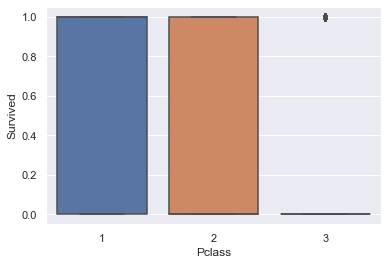

In [329]:
sns.boxplot(x = 'Pclass', y = 'Survived', data = data)

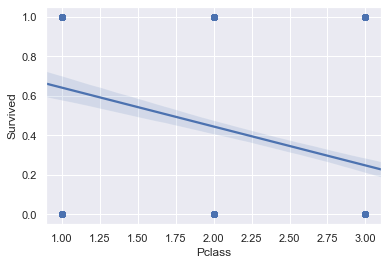

In [330]:
sns.regplot(x = 'Pclass', y = 'Survived', data = data)

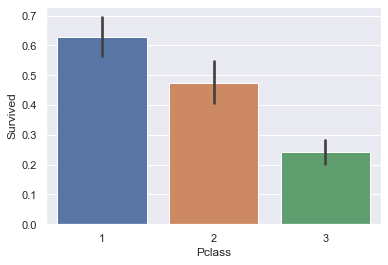

In [331]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

In [332]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Pclass 1 - more survivors, Pclass - 2 less survivors, Pclass - 3 least survivors - Pclass to be considered 

2) Sex - Females have a higher chance of survival than males, sex to be considered for prediction

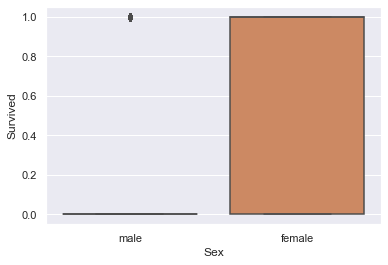

In [333]:
sns.boxplot(x = 'Sex', y = 'Survived', data = data)

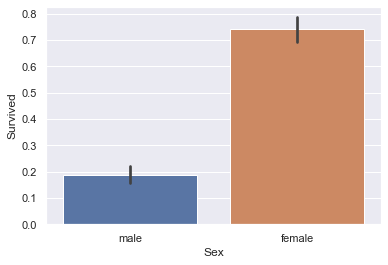

In [334]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

In [335]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [336]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Relatives',
       'Lonely', 'SmallFamily', 'LargeFamily'],
      dtype='object')

3) Age - As age increases survival reduces, age to be considered for prediction 

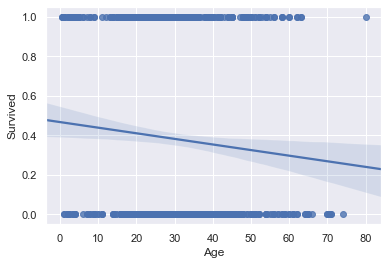

In [337]:
sns.regplot(x = 'Age', y = 'Survived', data = data)

4) Fare - As fare increase chances of survival increase, fare to be considered 

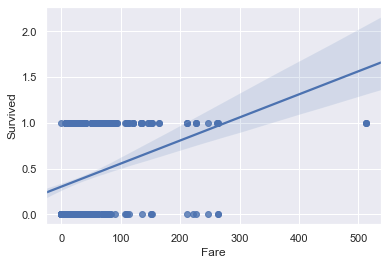

In [338]:
sns.regplot(x = 'Fare', y = 'Survived', data = data)

5) Cabin - B and D have higher chances of survival, while U and E have lower chances of survival, consider cabin as a variable

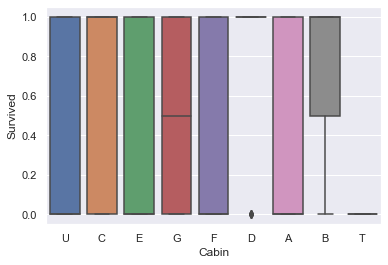

In [339]:
sns.boxplot(x = 'Cabin', y = 'Survived', data = data)

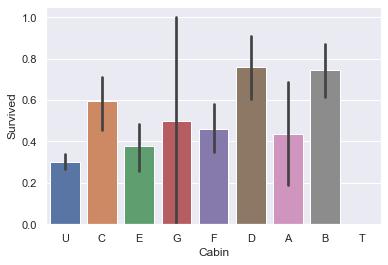

In [340]:
sns.barplot(x = 'Cabin', y = 'Survived', data = data)

6) Embarked - Chances of survival are more for those who have come from C - embarked to be considered 

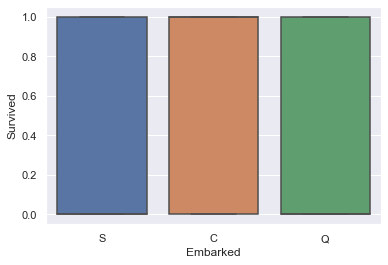

In [341]:
sns.boxplot(x = 'Embarked', y = 'Survived', data = data)

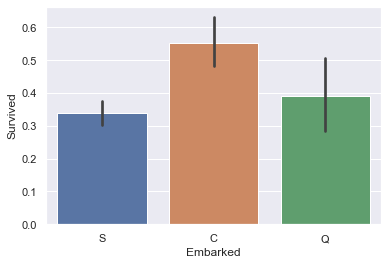

In [342]:
sns.barplot(x = 'Embarked', y = 'Survived', data = data)

In [343]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Relatives',
       'Lonely', 'SmallFamily', 'LargeFamily'],
      dtype='object')

7) Title - Unmarried have a higher probability of survival

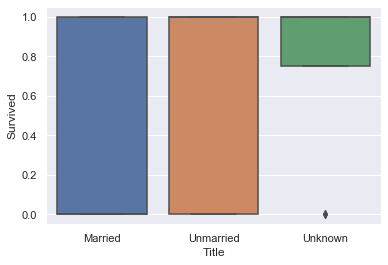

In [344]:
sns.boxplot(x = 'Title', y = 'Survived', data = data)

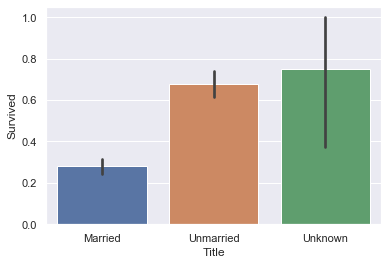

In [405]:
sns.barplot(x = 'Title', y = 'Survived', data = data)

8) Relatives - Cant see much of a difference but will still consider this as it is now (Processed this in titanic v1)

The second option is you can convert relatives to Lonely, Middle Size Family, Big Size Family (processed this in titanic v2)
But this option reduced the score of SVM and kept logistic regression score same 

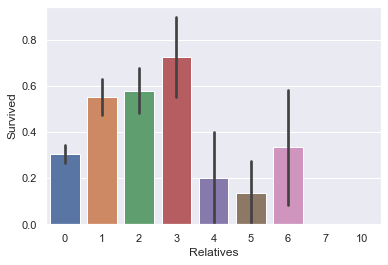

In [346]:
sns.barplot(x = 'Relatives', y = 'Survived', data = data)

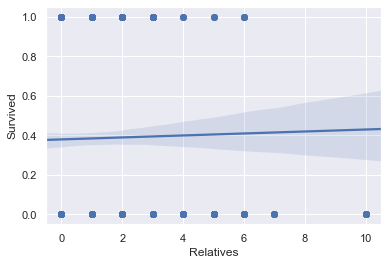

In [347]:
sns.regplot(x = 'Relatives', y = 'Survived', data = data)

In [348]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Relatives',
       'Lonely', 'SmallFamily', 'LargeFamily'],
      dtype='object')

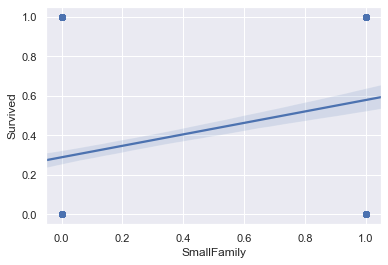

In [349]:
sns.regplot(x = 'SmallFamily', y = 'Survived', data = data)

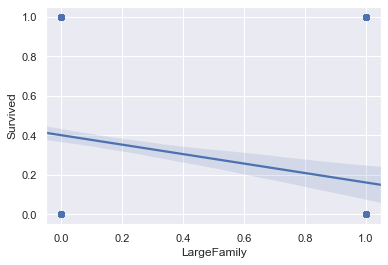

In [350]:
sns.regplot(x = 'LargeFamily', y = 'Survived', data = data)

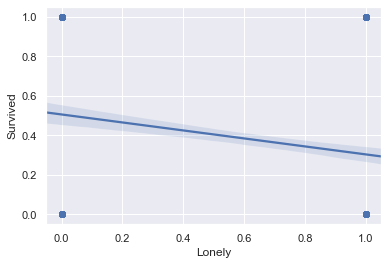

In [351]:
sns.regplot(x = 'Lonely', y = 'Survived', data = data)

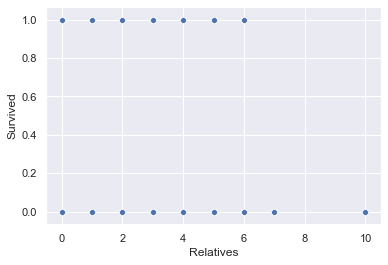

In [352]:
sns.scatterplot(x = 'Relatives', y = 'Survived', data = data)

In [353]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Relatives',
       'Lonely', 'SmallFamily', 'LargeFamily'],
      dtype='object')

### Conclusion to Data Visualization 

Independant Variables: Pclass, Fare, 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title', 'Lonely', 'SmallFamily', 'LargeFamily'

### There is one value Cabin T which seems to be an outlier drop the value 

In [354]:
data[data['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Lonely,SmallFamily,LargeFamily
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Married,0,1,0,0


In [355]:
data.loc[data['Cabin'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Lonely,SmallFamily,LargeFamily
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Married,0,1,0,0


In [356]:
data.drop(data[data['Cabin'] == 'T'].index, inplace = True)

### Split Data into x_train, x_test, y_train and find value of y_test

In [357]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Relatives',
       'Lonely', 'SmallFamily', 'LargeFamily'],
      dtype='object')

In [358]:
x_train = data[['Pclass', 'Fare', 'Sex', 'Age', 'Cabin', 'Embarked', 'Title', 'Lonely', 'SmallFamily', 'LargeFamily']]
y_train = data['Survived']
x_test = data_test[['Pclass', 'Fare', 'Sex', 'Age', 'Cabin', 'Embarked', 'Title', 'Lonely', 'SmallFamily', 'LargeFamily']]

In [359]:
x_train

,Pclass,Fare,Sex,Age,Cabin,Embarked,Title,Lonely,SmallFamily,LargeFamily
0,3,7.2500,male,22.0,U,S,Married,0,1,0
1,1,71.2833,female,38.0,C,C,Married,0,1,0
2,3,7.9250,female,26.0,U,S,Unmarried,1,0,0
3,1,53.1000,female,35.0,C,S,Married,0,1,0
4,3,8.0500,male,35.0,E,S,Married,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,male,27.0,U,S,Married,1,0,0
887,1,30.0000,female,19.0,B,S,Unmarried,1,0,0
888,3,23.4500,female,21.0,U,S,Unmarried,0,1,0
889,1,30.0000,male,26.0,C,C,Married,1,0,0


In [360]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 890, dtype: int64

In [361]:
x_test

,Pclass,Fare,Sex,Age,Cabin,Embarked,Title,Lonely,SmallFamily,LargeFamily
0,3,7.8292,male,34.5,U,Q,Married,1,0,0
1,3,7.0000,female,47.0,U,S,Married,0,1,0
2,2,9.6875,male,62.0,U,Q,Married,1,0,0
3,3,8.6625,male,27.0,U,S,Married,1,0,0
4,3,12.2875,female,22.0,U,S,Married,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,3,8.0500,male,28.5,E,S,Married,1,0,0
414,1,108.9000,female,39.0,C,C,Unknown,1,0,0
415,3,7.2500,male,38.5,U,S,Married,1,0,0
416,3,8.0500,male,28.5,E,S,Married,1,0,0


### Dummify Categorical Variables: Sex, Cabin, Embarked, Title

In [362]:
#pd.get_dummies(x_train['Sex'], prefix='Sex ')
#pd.get_dummies(x_train['Cabin'], prefix='Cabin ')
#pd.get_dummies(x_train['Embarked'], prefix='Embarked ')
#pd.get_dummies(x_train['Title'], prefix='Title ')
#pd.get_dummies(x_test['Sex'], prefix='Sex ')
#pd.get_dummies(x_test['Cabin'], prefix='Cabin ')
#pd.get_dummies(x_test['Embarked'], prefix='Embarked ')
#pd.get_dummies(x_test['Title'], prefix='Title ')

In [363]:
#def dummies(dum, row):
 #   title_dummies = pd.get_dummies(dum['row'], prefix='Row ')
  #  dum = pd.concat([dum, titles_dummies], axis=1)
   # print('Processing Done')
   # return dum

In [364]:
#x_train = dummies('Sex')

In [365]:
x_train.dtypes

Pclass           int64
Fare           float64
Sex             object
Age            float64
Cabin           object
Embarked        object
Title           object
Lonely           int64
SmallFamily      int64
LargeFamily      int64
dtype: object

In [366]:
x_train

,Pclass,Fare,Sex,Age,Cabin,Embarked,Title,Lonely,SmallFamily,LargeFamily
0,3,7.2500,male,22.0,U,S,Married,0,1,0
1,1,71.2833,female,38.0,C,C,Married,0,1,0
2,3,7.9250,female,26.0,U,S,Unmarried,1,0,0
3,1,53.1000,female,35.0,C,S,Married,0,1,0
4,3,8.0500,male,35.0,E,S,Married,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,male,27.0,U,S,Married,1,0,0
887,1,30.0000,female,19.0,B,S,Unmarried,1,0,0
888,3,23.4500,female,21.0,U,S,Unmarried,0,1,0
889,1,30.0000,male,26.0,C,C,Married,1,0,0


In [367]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [368]:
x_test.columns

Index(['Pclass', 'Fare', 'Age', 'Lonely', 'SmallFamily', 'LargeFamily',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Married', 'Title_Unknown', 'Title_Unmarried'],
      dtype='object')

In [369]:
x_train.columns

Index(['Pclass', 'Fare', 'Age', 'Lonely', 'SmallFamily', 'LargeFamily',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Married', 'Title_Unknown', 'Title_Unmarried'],
      dtype='object')

In [370]:
x_train.columns

Index(['Pclass', 'Fare', 'Age', 'Lonely', 'SmallFamily', 'LargeFamily',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Married', 'Title_Unknown', 'Title_Unmarried'],
      dtype='object')

In [371]:
x_train.shape

(890, 22)

In [372]:
x_test.shape

(418, 22)

In [373]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_scaled = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

# Data Modeling 

## 1) Logistic Regression 

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C= 0.01, solver = 'liblinear')

In [375]:
lr.fit(x_scaled, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [376]:
y_hat = lr.predict(x_scaled)

### Model Evaluation 

1) Distplot

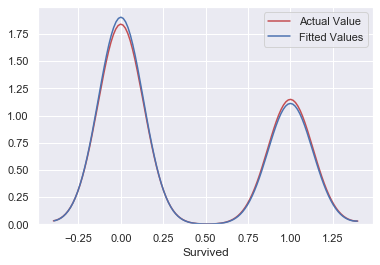

In [377]:
ax2 = sns.distplot(y_train, hist = False, color = 'r', label = 'Actual Value')
sns.distplot(y_hat, hist = False, color = 'b', label = 'Fitted Values', ax = ax2)

2) Using Jaccard Index

In [378]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_train, y_hat)

0.8224719101123595

3) Using Log loss

In [379]:
yhat_prob = lr.predict_proba(x_scaled)

In [380]:
from sklearn.metrics import log_loss
log_loss(y_train, yhat_prob)


0.44870935710282106

4) Using accuracy method and cross validation

In [381]:
from sklearn.model_selection import cross_val_score

In [382]:
xval = cross_val_score(lr, x_scaled, y_train, cv = 7, scoring='accuracy')

In [383]:
xval.mean()

0.8078743226293141

### Using Kushals method of multiple models

In [384]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [385]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [386]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
svc = SVC()
neigh = KNeighborsClassifier(n_neighbors = 3)
models = [logreg, logreg_cv, rf, svc, neigh]

In [387]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 7, scoring=scoring)
    return np.mean(xval)

In [388]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=x_scaled, y=y_train, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8157396899048334
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8146324064402665
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.797759097077151
****
Cross-validation of : <class 'sklearn.svm.classes.SVC'>
CV score = 0.8247566989394183
****
Cross-validation of : <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
CV score = 0.8090164789669149
****


### Model Selection: Looking at the scores SVC seems to be the best model but on uploading the result is to opposite

In [389]:
svc.fit(x_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [390]:
logreg.fit(x_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Generate output file to submit on Kaggle

In [391]:
surv_pred = svc.predict(x_scaled_test)
y_test = pd.DataFrame()
y_test['PassengerId'] = data_test['PassengerId']
y_test['Survived'] = surv_pred
y_test[['PassengerId','Survived']].to_csv('./titanic_svc2.csv', index=False)

In [392]:
surv_pred = logreg.predict(x_scaled_test)
y_test = pd.DataFrame()
y_test['PassengerId'] = data_test['PassengerId']
y_test['Survived'] = surv_pred
y_test[['PassengerId','Survived']].to_csv('./titanic_logreg_scaled.csv', index=False)